In [1]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib widget

def load_data(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.xlsx') or file_path.endswith('.xls'):
        return pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file format. Only CSV and Excel files are supported.")

file_path_widget = widgets.Text(description="Enter file path:")
load_button = widgets.Button(description="Load Data")
tail_button = widgets.Button(description="Show Tail")
dtype_button = widgets.Button(description="Show DataTypes")
describe_button = widgets.Button(description="Show Statistics")
missing_values_button = widgets.Button(description="Show Missing Values")
output_load = widgets.Output()
output_tail = widgets.Output()
output_dtype = widgets.Output()
output_describe = widgets.Output()
output_missing_values = widgets.Output()
output_charts = widgets.Output()  

data = None  # Store loaded data here

def load_button_click(b):
    global data
    with output_load:
        clear_output(wait=True)
        file_path = file_path_widget.value.strip()
        try:
            data = load_data(file_path)
            print("Data heads:")
            display(data.head())
            tail_button.disabled = False  # Enable the tail button
            dtype_button.disabled = False  # Enable the dtype button
            describe_button.disabled = False  # Enable the describe button
            missing_values_button.disabled = False  # Enable the missing values button
           
        except Exception as e:
            print("Error:", e)

def tail_button_click(b):
    if data is not None:
        with output_tail:
            clear_output(wait=True)
            print("\nTail of the data:")
            display(data.tail())

def dtype_button_click(b):
    if data is not None:
        with output_dtype:
            clear_output(wait=True)
            print("Data Types:")
            display(data.dtypes)

def describe_button_click(b):
    if data is not None:
        with output_describe:
            clear_output(wait=True)
            print("Data Statistics:")
            display(data.describe(include="all"))  

def missing_values_button_click(b):
    if data is not None:
        with output_missing_values:
            clear_output(wait=True)
            print("Sum of Missing Values:")
            missing_values_sum = data.isnull().sum()
            display(missing_values_sum)

load_button.on_click(load_button_click)
tail_button.on_click(tail_button_click)
dtype_button.on_click(dtype_button_click)
describe_button.on_click(describe_button_click)
missing_values_button.on_click(missing_values_button_click)
tail_button.disabled = True  # Disable the tail button initially
dtype_button.disabled = True  # Disable the dtype button initially
describe_button.disabled = True  # Disable the describe button initially
missing_values_button.disabled = True  # Disable the missing values button initially

# Arrange buttons horizontally
button_box = widgets.HBox([load_button, tail_button, dtype_button, describe_button, missing_values_button])
widgets.VBox([file_path_widget, button_box, output_load, output_tail, output_dtype, output_describe, output_missing_values, output_charts])



interactive(children=(Dropdown(description='x_column', options=('Year', 'Month', 'usg_apt_id', 'usg_wac', 'fg_…

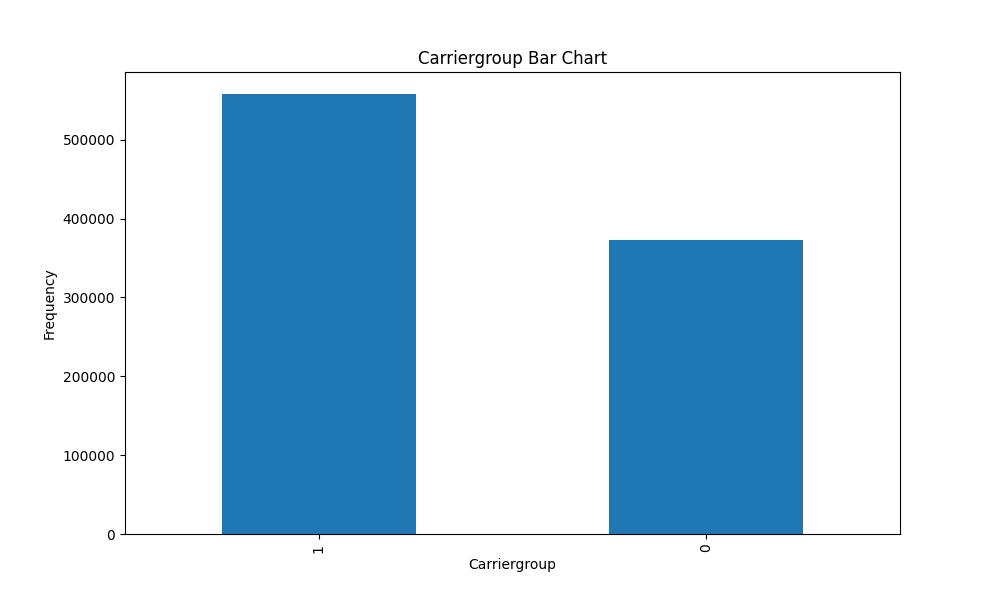

In [20]:

# Create a scatter chart
def create_scatter_plot(x_column, y_column):
    if (data[x_column].dtype == 'float64' or data[x_column].dtype == 'int64') and \
       (data[y_column].dtype == 'float64' or data[y_column].dtype == 'int64'):
        plt.figure(figsize=(10, 6))
        plt.scatter(data[x_column], data[y_column], alpha=0.5)   
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title("Scatter Plot")
        plt.show()
    else:
        print("Both X and Y columns should be numerical (int or float).")

# Create a bar chart
def create_carriergroup_bar_chart():
    plt.figure(figsize=(10, 6))
    data['carriergroup'].value_counts().plot(kind='bar')
    plt.xlabel('Carriergroup')
    plt.ylabel('Frequency')
    plt.title('Carriergroup Bar Chart')
    plt.show()



try:
    interact(create_scatter_plot, x_column=data.select_dtypes(include=['int64', 'float64']).columns.tolist(),
             y_column=data.select_dtypes(include=['int64', 'float64']).columns.tolist())
    create_carriergroup_bar_chart()
except:
    print('An exception occurred')

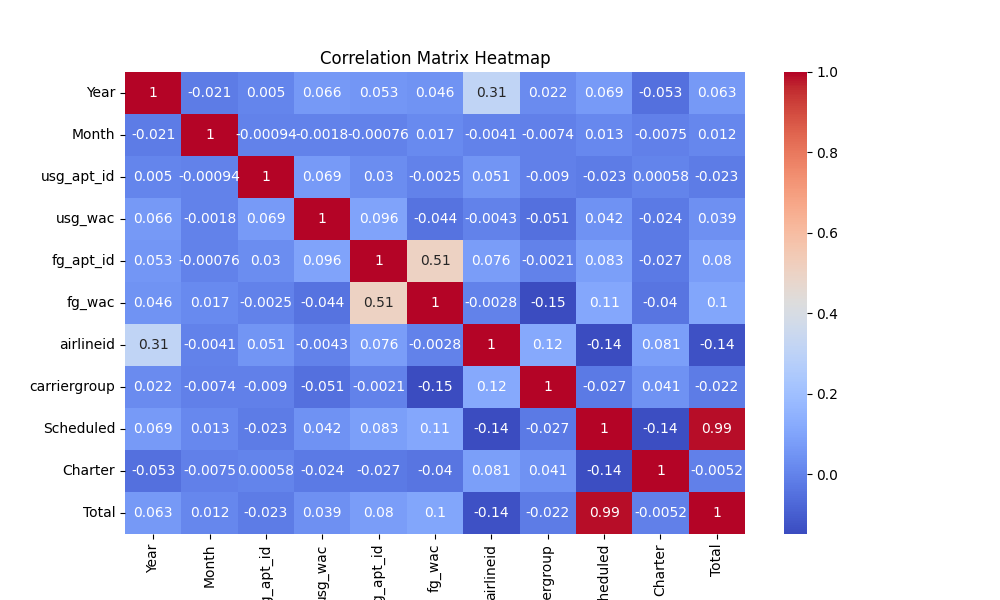

In [21]:
import seaborn as sns

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()